# Practice Project - 1
Red Wine Quality Prediction

In [1]:
import numpy as np
import pandas as pd
import sklearn
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('winequality-red.csv')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [3]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,1589,1590,1591,1592,1593,1594,1595,1596,1597,1598
fixed acidity,7.4000,7.8000,7.800,11.200,7.4000,7.4000,7.9000,7.3000,7.8000,7.5000,...,6.6000,6.30000,5.40000,6.30000,6.80000,6.2000,5.90000,6.30000,5.90000,6.00000
volatile acidity,0.7000,0.8800,0.760,0.280,0.7000,0.6600,0.6000,0.6500,0.5800,0.5000,...,0.7250,0.55000,0.74000,0.51000,0.62000,0.6000,0.55000,0.51000,0.64500,0.31000
citric acid,0.0000,0.0000,0.040,0.560,0.0000,0.0000,0.0600,0.0000,0.0200,0.3600,...,0.2000,0.15000,0.09000,0.13000,0.08000,0.0800,0.10000,0.13000,0.12000,0.47000
residual sugar,1.9000,2.6000,2.300,1.900,1.9000,1.8000,1.6000,1.2000,2.0000,6.1000,...,7.8000,1.80000,1.70000,2.30000,1.90000,2.0000,2.20000,2.30000,2.00000,3.60000
chlorides,0.0760,0.0980,0.092,0.075,0.0760,0.0750,0.0690,0.0650,0.0730,0.0710,...,0.0730,0.07700,0.08900,0.07600,0.06800,0.0900,0.06200,0.07600,0.07500,0.06700
free sulfur dioxide,11.0000,25.0000,15.000,17.000,11.0000,13.0000,15.0000,15.0000,9.0000,17.0000,...,29.0000,26.00000,16.00000,29.00000,28.00000,32.0000,39.00000,29.00000,32.00000,18.00000
total sulfur dioxide,34.0000,67.0000,54.000,60.000,34.0000,40.0000,59.0000,21.0000,18.0000,102.0000,...,79.0000,35.00000,26.00000,40.00000,38.00000,44.0000,51.00000,40.00000,44.00000,42.00000
density,0.9978,0.9968,0.997,0.998,0.9978,0.9978,0.9964,0.9946,0.9968,0.9978,...,0.9977,0.99314,0.99402,0.99574,0.99651,0.9949,0.99512,0.99574,0.99547,0.99549
pH,3.5100,3.2000,3.260,3.160,3.5100,3.5100,3.3000,3.3900,3.3600,3.3500,...,3.2900,3.32000,3.67000,3.42000,3.42000,3.4500,3.52000,3.42000,3.57000,3.39000
sulphates,0.5600,0.6800,0.650,0.580,0.5600,0.5600,0.4600,0.4700,0.5700,0.8000,...,0.5400,0.82000,0.56000,0.75000,0.82000,0.5800,0.76000,0.75000,0.71000,0.66000


In [4]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [5]:
df.shape

(1599, 12)

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [8]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

<AxesSubplot:xlabel='fixed acidity', ylabel='quality'>

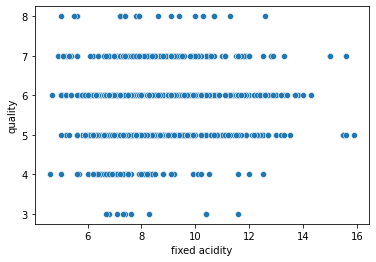

In [9]:
sns.scatterplot(x='fixed acidity',y='quality',data=df)

<AxesSubplot:xlabel='volatile acidity', ylabel='quality'>

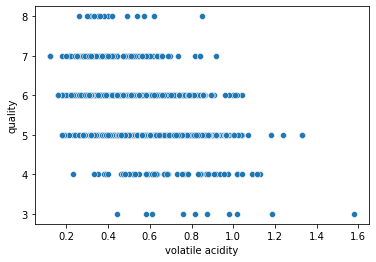

In [10]:
sns.scatterplot(x='volatile acidity',y='quality',data=df)

<AxesSubplot:xlabel='citric acid', ylabel='quality'>

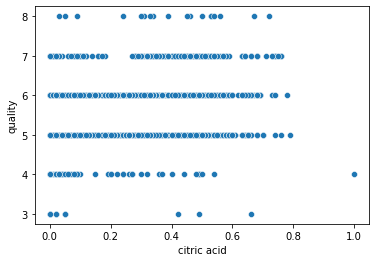

In [11]:
sns.scatterplot(x='citric acid',y='quality',data=df)

<AxesSubplot:xlabel='residual sugar', ylabel='quality'>

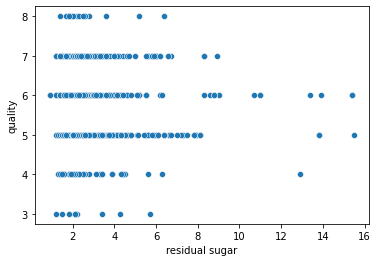

In [12]:
sns.scatterplot(x='residual sugar',y='quality',data=df)

<AxesSubplot:xlabel='chlorides', ylabel='quality'>

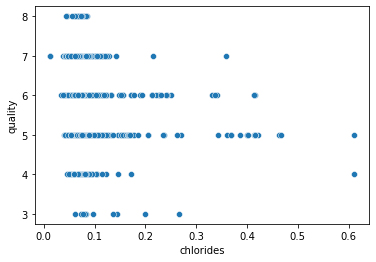

In [13]:
sns.scatterplot(x='chlorides',y='quality',data=df)

<AxesSubplot:xlabel='free sulfur dioxide', ylabel='quality'>

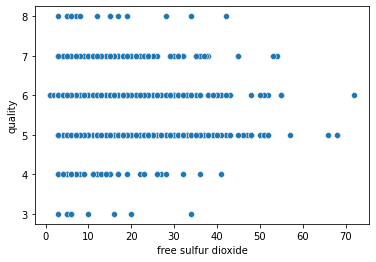

In [14]:
sns.scatterplot(x='free sulfur dioxide',y='quality',data=df)

<AxesSubplot:xlabel='total sulfur dioxide', ylabel='quality'>

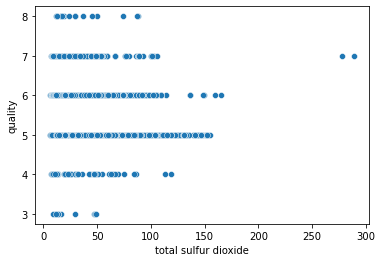

In [15]:
sns.scatterplot(x='total sulfur dioxide',y='quality',data=df)

<AxesSubplot:xlabel='density', ylabel='quality'>

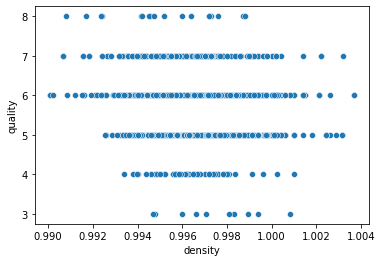

In [16]:
sns.scatterplot(x='density',y='quality',data=df)

<AxesSubplot:xlabel='pH', ylabel='quality'>

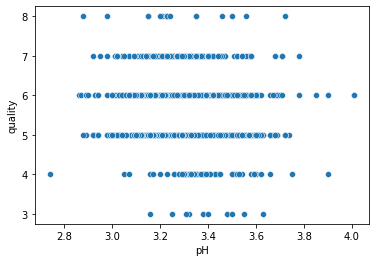

In [17]:
sns.scatterplot(x='pH',y='quality',data=df)

<AxesSubplot:xlabel='sulphates', ylabel='quality'>

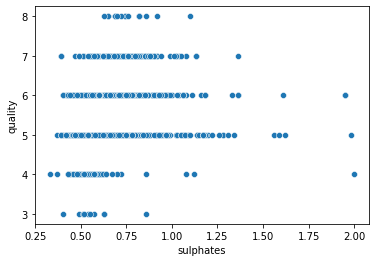

In [18]:
sns.scatterplot(x='sulphates',y='quality',data=df)

<AxesSubplot:xlabel='alcohol', ylabel='quality'>

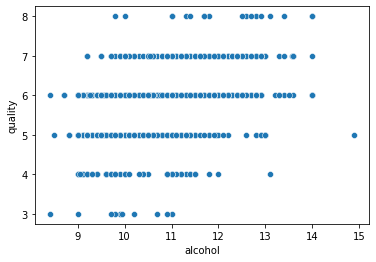

In [19]:
sns.scatterplot(x='alcohol',y='quality',data=df)

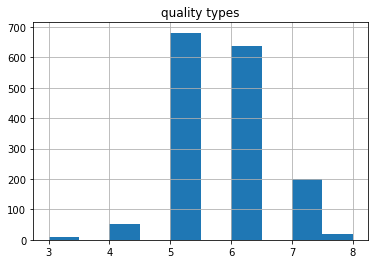

In [20]:
df['quality'].hist()
plt.title('quality types')
plt.show()

In [21]:
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [22]:
df['quality'].value_counts(normalize=True)*100

5    42.589118
6    39.899937
7    12.445278
4     3.314572
8     1.125704
3     0.625391
Name: quality, dtype: float64

In [23]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


<AxesSubplot:>

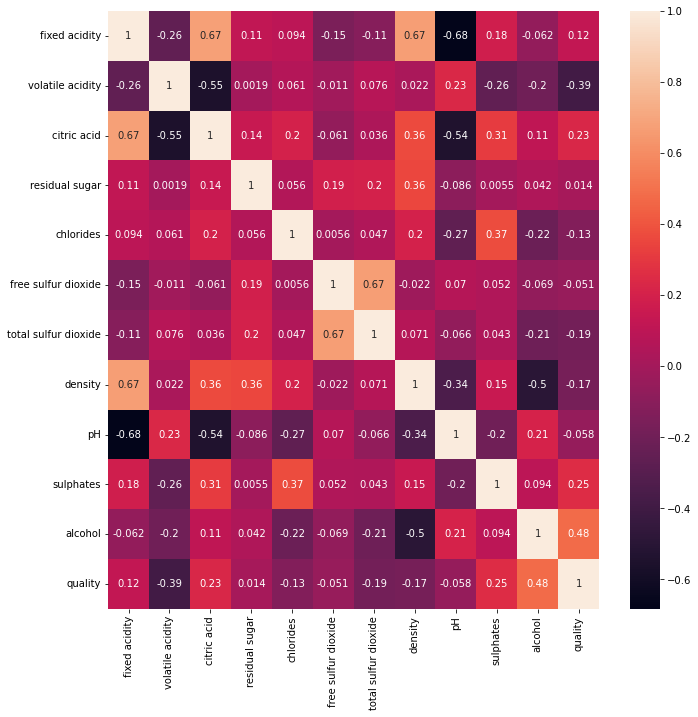

In [24]:
plt.figure(figsize=(11,11))
sns.heatmap(df.corr(),annot=True)

In [25]:
corr=df.corr()
corr['quality'].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64

In [26]:
# max correlation = alcohol
# min correlation = volatile acidity 
df=df.drop('volatile acidity',axis=1)

In [27]:
df

,fixed acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [28]:
df.describe()

,fixed acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [29]:
df.describe().shape

(8, 11)

<AxesSubplot:>

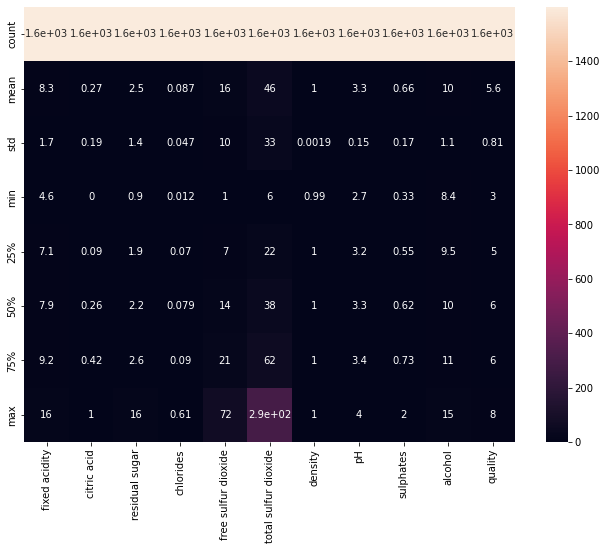

In [30]:
plt.figure(figsize=(11,8))
sns.heatmap(df.describe(),annot=True)

In [31]:
df['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   citric acid           1599 non-null   float64
 2   residual sugar        1599 non-null   float64
 3   chlorides             1599 non-null   float64
 4   free sulfur dioxide   1599 non-null   float64
 5   total sulfur dioxide  1599 non-null   float64
 6   density               1599 non-null   float64
 7   pH                    1599 non-null   float64
 8   sulphates             1599 non-null   float64
 9   alcohol               1599 non-null   float64
 10  quality               1599 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 137.5 KB


In [33]:
df.skew()

fixed acidity           0.982751
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 0.217802
dtype: float64

In [34]:
x=df.iloc[:,:-1]
y=df['quality']

In [35]:
x

,fixed acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [36]:
y

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64

In [37]:
y.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [38]:
y.value_counts(normalize=True)*100

5    42.589118
6    39.899937
7    12.445278
4     3.314572
8     1.125704
3     0.625391
Name: quality, dtype: float64

<AxesSubplot:xlabel='quality', ylabel='count'>

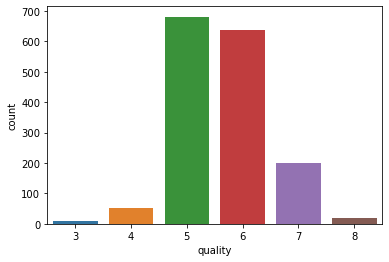

In [39]:
sns.countplot(y)

In [40]:
import sklearn
from imblearn.over_sampling import SMOTE

In [41]:
smt=SMOTE()
new_x,newy=smt.fit_resample(x,y)

In [42]:
new_x.value_counts()

fixed acidity  citric acid  residual sugar  chlorides  free sulfur dioxide  total sulfur dioxide  density   pH        sulphates  alcohol  
10.700000      0.530000     2.600000        0.070000   5.000000             16.000000             0.997200  3.150000  0.650000   11.000000    11
8.900000       0.450000     1.800000        0.075000   10.000000            21.000000             0.995520  3.410000  0.760000   11.900000    10
7.200000       0.460000     2.100000        0.074000   24.000000            44.000000             0.995340  3.400000  0.850000   11.000000     9
5.600000       0.000000     2.200000        0.087000   3.000000             11.000000             0.993780  3.710000  0.630000   12.800000     5
7.300000       0.320000     2.100000        0.062000   31.000000            54.000000             0.997280  3.300000  0.650000   10.000000     5
                                                                                                                                        

In [43]:
newy.value_counts()

5    681
6    681
7    681
4    681
8    681
3    681
Name: quality, dtype: int64

<AxesSubplot:xlabel='quality', ylabel='count'>

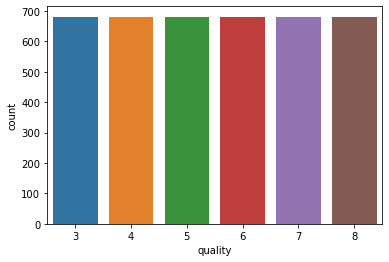

In [44]:
sns.countplot(newy)

In [45]:
new_x.skew()

fixed acidity           0.765027
citric acid             0.290173
residual sugar          3.676334
chlorides               5.265517
free sulfur dioxide     1.363309
total sulfur dioxide    1.841112
density                -0.043556
pH                      0.044572
sulphates               2.356713
alcohol                 0.552392
dtype: float64

In [46]:
new_x

,fixed acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.400000,0.000000,1.900000,0.076000,11.000000,34.000000,0.997800,3.510000,0.560000,9.400000
1,7.800000,0.000000,2.600000,0.098000,25.000000,67.000000,0.996800,3.200000,0.680000,9.800000
2,7.800000,0.040000,2.300000,0.092000,15.000000,54.000000,0.997000,3.260000,0.650000,9.800000
3,11.200000,0.560000,1.900000,0.075000,17.000000,60.000000,0.998000,3.160000,0.580000,9.800000
4,7.400000,0.000000,1.900000,0.076000,11.000000,34.000000,0.997800,3.510000,0.560000,9.400000
...,...,...,...,...,...,...,...,...,...,...
4081,9.175337,0.463783,3.512768,0.079751,7.249802,17.750198,0.994769,3.207502,0.708747,13.212530
4082,9.833906,0.506967,4.535622,0.076625,5.517883,15.071531,0.996979,3.188569,0.871788,12.133906
4083,6.371654,0.274291,1.885696,0.068001,17.856955,35.140416,0.993123,3.445669,0.717139,12.514042
4084,8.596804,0.432907,2.093531,0.073097,7.419330,16.419330,0.993668,3.205807,0.702580,12.751598


In [47]:
import numpy as np 
from sklearn.preprocessing import power_transform

In [48]:
newx=power_transform(new_x)
newx

array([[-0.52093975, -1.44280078, -0.72453211, ...,  1.17171836,
        -0.62836943, -1.2312041 ],
       [-0.23742631, -1.44280078,  0.41303492, ..., -0.80017086,
         0.32254312, -0.76800757],
       [-0.23742631, -1.18340203,  0.0090016 , ..., -0.4148268 ,
         0.11203074, -0.76800757],
       ...,
       [-1.35619718,  0.11209029, -0.75623066, ...,  0.76632743,
         0.56193401,  1.44395911],
       [ 0.27208813,  0.82462595, -0.33593007, ..., -0.76279806,
         0.47073523,  1.58292317],
       [-0.04712313,  0.50155956,  0.46800643, ..., -0.7931567 ,
         0.56946694,  1.78404622]])

In [49]:
dfx=pd.DataFrame(data=newx,columns=x.columns)
dfx

,fixed acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.520940,-1.442801,-0.724532,-0.206791,0.097407,0.325014,0.680822,1.171718,-0.628369,-1.231204
1,-0.237426,-1.442801,0.413035,0.718126,1.228896,1.211403,0.139047,-0.800171,0.322543,-0.768008
2,-0.237426,-1.183402,0.009002,0.503763,0.541297,0.942436,0.247133,-0.414827,0.112031,-0.768008
3,1.563864,1.325185,-0.724532,-0.259038,0.714994,1.075288,0.789580,-1.058087,-0.448131,-0.768008
4,-0.520940,-1.442801,-0.724532,-0.206791,0.097407,0.325014,0.680822,1.171718,-0.628369,-1.231204
...,...,...,...,...,...,...,...,...,...,...
4081,0.602851,0.951412,1.203831,-0.019723,-0.525073,-0.637167,-0.950808,-0.751890,0.509771,1.834762
4082,0.945735,1.123013,1.683702,-0.174647,-0.943949,-0.896260,0.235530,-0.873790,1.355907,1.207281
4083,-1.356197,0.112090,-0.756231,-0.655042,0.782339,0.370903,-1.824377,0.766327,0.561934,1.443959
4084,0.272088,0.824626,-0.335930,-0.361371,-0.489934,-0.759793,-1.536157,-0.762798,0.470735,1.582923


In [50]:
dfx.skew().sort_values(ascending=False)

residual sugar          0.050533
total sulfur dioxide    0.050130
free sulfur dioxide     0.048289
alcohol                 0.042474
chlorides               0.025807
citric acid             0.019993
density                 0.002881
pH                      0.002589
fixed acidity           0.002476
sulphates              -0.011792
dtype: float64

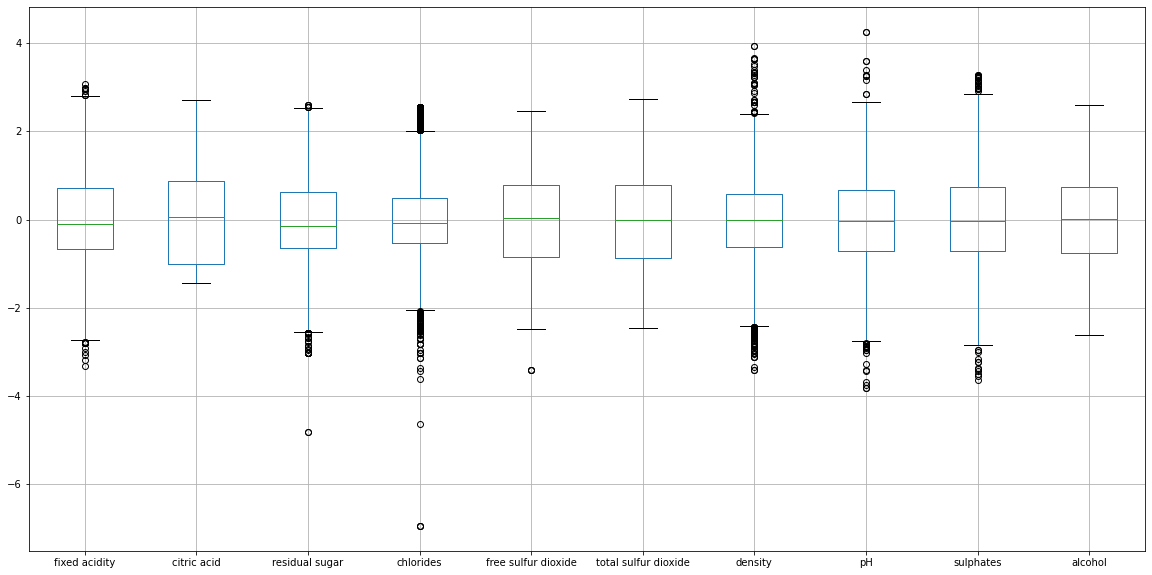

In [51]:
dfx.iloc[:].boxplot(figsize=(20,10))
plt.show()

In [52]:
from scipy.stats import zscore
zscore=np.abs(zscore(dfx))
zscore

,fixed acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.520940,1.442801,0.724532,0.206791,0.097407,0.325014,0.680822,1.171718,0.628369,1.231204
1,0.237426,1.442801,0.413035,0.718126,1.228896,1.211403,0.139047,0.800171,0.322543,0.768008
2,0.237426,1.183402,0.009002,0.503763,0.541297,0.942436,0.247133,0.414827,0.112031,0.768008
3,1.563864,1.325185,0.724532,0.259038,0.714994,1.075288,0.789580,1.058087,0.448131,0.768008
4,0.520940,1.442801,0.724532,0.206791,0.097407,0.325014,0.680822,1.171718,0.628369,1.231204
...,...,...,...,...,...,...,...,...,...,...
4081,0.602851,0.951412,1.203831,0.019723,0.525073,0.637167,0.950808,0.751890,0.509771,1.834762
4082,0.945735,1.123013,1.683702,0.174647,0.943949,0.896260,0.235530,0.873790,1.355907,1.207281
4083,1.356197,0.112090,0.756231,0.655042,0.782339,0.370903,1.824377,0.766327,0.561934,1.443959
4084,0.272088,0.824626,0.335930,0.361371,0.489934,0.759793,1.536157,0.762798,0.470735,1.582923


In [53]:
xnew=dfx[(zscore<3).all(axis=1)]
xnew

,fixed acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.520940,-1.442801,-0.724532,-0.206791,0.097407,0.325014,0.680822,1.171718,-0.628369,-1.231204
1,-0.237426,-1.442801,0.413035,0.718126,1.228896,1.211403,0.139047,-0.800171,0.322543,-0.768008
2,-0.237426,-1.183402,0.009002,0.503763,0.541297,0.942436,0.247133,-0.414827,0.112031,-0.768008
3,1.563864,1.325185,-0.724532,-0.259038,0.714994,1.075288,0.789580,-1.058087,-0.448131,-0.768008
4,-0.520940,-1.442801,-0.724532,-0.206791,0.097407,0.325014,0.680822,1.171718,-0.628369,-1.231204
...,...,...,...,...,...,...,...,...,...,...
4081,0.602851,0.951412,1.203831,-0.019723,-0.525073,-0.637167,-0.950808,-0.751890,0.509771,1.834762
4082,0.945735,1.123013,1.683702,-0.174647,-0.943949,-0.896260,0.235530,-0.873790,1.355907,1.207281
4083,-1.356197,0.112090,-0.756231,-0.655042,0.782339,0.370903,-1.824377,0.766327,0.561934,1.443959
4084,0.272088,0.824626,-0.335930,-0.361371,-0.489934,-0.759793,-1.536157,-0.762798,0.470735,1.582923


In [54]:
x.shape

(1599, 10)

In [55]:
xnew.shape

(4000, 10)

In [56]:
ynew=newy[(zscore<3).all(axis=1)]
ynew

0       5
1       5
2       5
3       6
4       5
       ..
4081    8
4082    8
4083    8
4084    8
4085    8
Name: quality, Length: 4000, dtype: int64

In [57]:
y.shape

(1599,)

In [58]:
ynew.shape

(4000,)

In [59]:
from sklearn.preprocessing import StandardScaler 
ss=StandardScaler()
xnew_=ss.fit_transform(xnew)
xnew_

array([[-0.52991443, -1.44811848, -0.74062333, ...,  1.20576024,
        -0.64540254, -1.24008961],
       [-0.24014502, -1.44811848,  0.42235552, ..., -0.8466502 ,
         0.33742201, -0.7735538 ],
       [-0.24014502, -1.18570188,  0.00929661, ..., -0.44557079,
         0.11984497, -0.7735538 ],
       ...,
       [-1.38360252,  0.12486228, -0.77302999, ...,  0.78381536,
         0.58484671,  1.45435935],
       [ 0.28061228,  0.84568762, -0.3433404 , ..., -0.8077513 ,
         0.49058735,  1.59432524],
       [-0.04564265,  0.51886265,  0.47855503, ..., -0.83934962,
         0.59263243,  1.79689822]])

In [60]:
newy.value_counts()

5    681
6    681
7    681
4    681
8    681
3    681
Name: quality, dtype: int64

In [61]:
xnew_.shape

(4000, 10)

In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [63]:
lr=LogisticRegression()

In [64]:
for i in range(0,1000):
    x_train,x_test,y_train,y_test=train_test_split(xnew_,ynew,test_size=0.20,random_state=i)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    if round(accuracy_score(y_train,pred_train)*100,1)==round(accuracy_score(y_test,pred_test)*100,1):
        print('At random_state, ' , i ,' the model performs very well')
        print('At random_state : ' , i )
        print('Training_accuracy : ' ,accuracy_score(y_train,pred_train)*100)
        print('Testing accuracy : ',accuracy_score(y_test,pred_test)*100)

At random_state,  15  the model performs very well
At random_state :  15
Training_accuracy :  56.84375000000001
Testing accuracy :  56.75
At random_state,  130  the model performs very well
At random_state :  130
Training_accuracy :  57.1875
Testing accuracy :  57.25
At random_state,  142  the model performs very well
At random_state :  142
Training_accuracy :  57.125
Testing accuracy :  57.125
At random_state,  148  the model performs very well
At random_state :  148
Training_accuracy :  57.06250000000001
Testing accuracy :  57.125
At random_state,  247  the model performs very well
At random_state :  247
Training_accuracy :  57.8125
Testing accuracy :  57.75
At random_state,  323  the model performs very well
At random_state :  323
Training_accuracy :  56.75
Testing accuracy :  56.75
At random_state,  415  the model performs very well
At random_state :  415
Training_accuracy :  57.15625
Testing accuracy :  57.25
At random_state,  465  the model performs very well
At random_state :  4

In [65]:
x_train,x_test,y_train,y_test=train_test_split(xnew_,ynew,test_size=0.20,random_state=968)
lr.fit(x_train,y_train)
predlr=lr.predict(x_test)
print(accuracy_score(y_test,predlr)*100)

56.375


In [66]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [67]:
criterion=['gini','entropy','log_loss']
 
for i in criterion:
    dtc=DecisionTreeClassifier(criterion=i)
    dtc.fit(x_train,y_train)
    preddtc=dtc.predict(x_test)
    print(accuracy_score(y_test,preddtc))
    print('Random_state: ' ,i)    

0.7925
Random_state:  gini
0.7975
Random_state:  entropy
0.79
Random_state:  log_loss


In [68]:
dtc1=DecisionTreeClassifier(criterion='gini')
dtc1.fit(x_train,y_train)

DecisionTreeClassifier()

In [69]:
preddtc1=dtc1.predict(x_test)
print(accuracy_score(y_test,preddtc1))

0.7875


In [70]:
n_estimators=[100,150,200]
for i in n_estimators:
    rfc=RandomForestClassifier(n_estimators=i)
    rfc.fit(x_train,y_train)
    predrfc=rfc.predict(x_test)
    print(accuracy_score(y_test,predrfc))

0.86
0.87375
0.87625


In [71]:
rfc1=RandomForestClassifier(n_estimators=150)
rfc1.fit(x_train,y_train)

RandomForestClassifier(n_estimators=150)

In [72]:
predrfc1=rfc1.predict(x_test)
print(accuracy_score(y_test,predrfc1))

0.8725


In [73]:
kernel=['rbf','linear','poly']
for i in kernel:
    svc=SVC(kernel=i)
    svc.fit(x_train,y_train)
    predsvc=svc.predict(x_test)
    print(accuracy_score(y_test,predsvc))

0.7575
0.6
0.72875


In [74]:
svc1=SVC(kernel='rbf')
svc1.fit(x_train,y_train)

SVC()

In [75]:
predsvc1=svc1.predict(x_test)
print(accuracy_score(y_test,predsvc1))

0.7575


In [76]:
from sklearn.model_selection import cross_val_score

In [77]:
for i in range(2,10):
    cross=cross_val_score(lr,xnew_,ynew,cv=i)
    print(cross)
    print('Cross Validation of model Logistic Regression of cv= ' ,i ,'is:' , cross.mean())

[0.5455 0.5285]
Cross Validation of model Logistic Regression of cv=  2 is: 0.5369999999999999
[0.53298351 0.54988747 0.54538635]
Cross Validation of model Logistic Regression of cv=  3 is: 0.542752442233497
[0.536 0.546 0.572 0.528]
Cross Validation of model Logistic Regression of cv=  4 is: 0.5455
[0.55    0.54625 0.56875 0.5575  0.52875]
Cross Validation of model Logistic Regression of cv=  5 is: 0.55025
[0.53523238 0.55622189 0.56221889 0.55922039 0.55555556 0.54654655]
Cross Validation of model Logistic Regression of cv=  6 is: 0.5524992758875816
[0.54020979 0.55244755 0.54545455 0.57443082 0.56042032 0.54991243
 0.54640981]
Cross Validation of model Logistic Regression of cv=  7 is: 0.552755038306702
[0.524 0.564 0.532 0.566 0.58  0.568 0.552 0.528]
Cross Validation of model Logistic Regression of cv=  8 is: 0.55175
[0.51011236 0.59550562 0.54157303 0.53483146 0.58108108 0.5472973
 0.57657658 0.55405405 0.52927928]
Cross Validation of model Logistic Regression of cv=  9 is: 0.552

In [78]:
for i in range(2,10):
    cross=cross_val_score(dtc,xnew_,ynew,cv=i)
    print(cross)
    print('Cross Validation of model DecisionTreeClassifier of cv= ' ,i ,'is:' , cross.mean())

[0.7005 0.6765]
Cross Validation of model DecisionTreeClassifier of cv=  2 is: 0.6885
[0.69790105 0.73143286 0.7351838 ]
Cross Validation of model DecisionTreeClassifier of cv=  3 is: 0.7215059012129345
[0.701 0.716 0.736 0.755]
Cross Validation of model DecisionTreeClassifier of cv=  4 is: 0.7269999999999999
[0.7075  0.73    0.73625 0.73125 0.77   ]
Cross Validation of model DecisionTreeClassifier of cv=  5 is: 0.7350000000000001
[0.71664168 0.73163418 0.71064468 0.72413793 0.75525526 0.76426426]
Cross Validation of model DecisionTreeClassifier of cv=  6 is: 0.7337629983806896
[0.6993007  0.73251748 0.70454545 0.73380035 0.73730298 0.74255692
 0.75131349]
Cross Validation of model DecisionTreeClassifier of cv=  7 is: 0.7287624809516228
[0.722 0.768 0.756 0.73  0.768 0.754 0.762 0.756]
Cross Validation of model DecisionTreeClassifier of cv=  8 is: 0.752
[0.72134831 0.73932584 0.73932584 0.75730337 0.73873874 0.73648649
 0.76576577 0.7972973  0.74099099]
Cross Validation of model Decisi

In [79]:
for i in range(2,10):
    cross=cross_val_score(rfc,xnew_,ynew,cv=i)
    print(cross)
    print('Cross Validation of model RandomForestClasifier of cv= ' ,i ,'is:' , cross.mean())

[0.7715 0.7515]
Cross Validation of model RandomForestClasifier of cv=  2 is: 0.7615
[0.7976012  0.79294824 0.7951988 ]
Cross Validation of model RandomForestClasifier of cv=  3 is: 0.7952494120531632
[0.818 0.785 0.804 0.805]
Cross Validation of model RandomForestClasifier of cv=  4 is: 0.803
[0.8275  0.785   0.805   0.83125 0.80375]
Cross Validation of model RandomForestClasifier of cv=  5 is: 0.8105
[0.83508246 0.79910045 0.79610195 0.80809595 0.82132132 0.81831832]
Cross Validation of model RandomForestClasifier of cv=  6 is: 0.813003408205807
[0.81118881 0.80944056 0.8006993  0.80735552 0.81961471 0.83012259
 0.82661996]
Cross Validation of model RandomForestClasifier of cv=  7 is: 0.8150059222738733
[0.82  0.822 0.814 0.794 0.822 0.808 0.83  0.822]
Cross Validation of model RandomForestClasifier of cv=  8 is: 0.8165
[0.8247191  0.83370787 0.78876404 0.78426966 0.80855856 0.81531532
 0.80405405 0.83108108 0.83108108]
Cross Validation of model RandomForestClasifier of cv=  9 is: 0.

In [80]:
for i in range(2,10):
    cross=cross_val_score(svc,xnew_,ynew,cv=i)
    print(cross)
    print('Cross Validation of model SVC of cv= ' ,i ,'is:' , cross.mean())

[0.6485 0.681 ]
Cross Validation of model SVC of cv=  2 is: 0.66475
[0.64392804 0.68867217 0.70817704]
Cross Validation of model SVC of cv=  3 is: 0.6802590827616949
[0.654 0.693 0.693 0.701]
Cross Validation of model SVC of cv=  4 is: 0.68525
[0.66375 0.70875 0.69875 0.71    0.71125]
Cross Validation of model SVC of cv=  5 is: 0.6985
[0.65967016 0.69715142 0.69415292 0.68215892 0.71171171 0.72222222]
Cross Validation of model SVC of cv=  6 is: 0.6945112278695486
[0.66258741 0.67832168 0.69405594 0.73029772 0.69176883 0.71803853
 0.72504378]
Cross Validation of model SVC of cv=  7 is: 0.7000162709444672
[0.678 0.672 0.708 0.712 0.698 0.708 0.734 0.714]
Cross Validation of model SVC of cv=  8 is: 0.7030000000000001
[0.68089888 0.68988764 0.71460674 0.66741573 0.72972973 0.67342342
 0.72072072 0.76351351 0.69369369]
Cross Validation of model SVC of cv=  9 is: 0.703765563316125


In [81]:
cross=cross_val_score(rfc,xnew_,ynew,cv=8)
print(cross)
print('Best cross value score is in RandomForestClassifier at cv=8 :' ,cross.mean())

[0.832 0.832 0.802 0.79  0.816 0.814 0.848 0.828]
Best cross value score is in RandomForestClassifier at cv=8 : 0.82025


In [82]:
from sklearn.model_selection import GridSearchCV

In [83]:
param_grid={'n_estimators':[100,150,200],'criterion':['gini','entropy']}
gsv=GridSearchCV(estimator=rfc,param_grid=param_grid,cv=8)
gsv.fit(x_train,y_train)

GridSearchCV(cv=8, estimator=RandomForestClassifier(n_estimators=200),
             param_grid={'criterion': ['gini', 'entropy'],
                         'n_estimators': [100, 150, 200]})

In [84]:
predgsv=gsv.predict(x_test)
print(accuracy_score(y_test,predgsv))

0.8625


In [85]:
print(gsv.best_params_)
print(gsv.best_estimator_)

{'criterion': 'gini', 'n_estimators': 150}
RandomForestClassifier(n_estimators=150)


In [86]:
import pickle

In [87]:
filename='RedWineQuality.pkl'
pickle.dump(gsv.best_estimator_,open(filename,'wb'))

In [88]:
newredwine=pickle.load(open(filename,'rb'))

In [89]:
print(newredwine)

RandomForestClassifier(n_estimators=150)
